####  <span style="font-family: Arial; font-weight:bold;font-size:1.9em;color:#0e92ea"> EnsembleTechniques

In [1]:
import os
import warnings

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.metrics as metrics

from matplotlib import gridspec
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import tree

from os import system
from IPython.display import Image


warnings.filterwarnings('ignore')                                       # Ignore/Do not display warnings

main_data = pd.read_csv('credit_2.csv')

In [2]:
main_data.head(10)

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
0,< 0 DM,6,critical,furniture/appliances,1169,unknown,> 7 years,4,4,67,none,own,2,skilled,1,yes,no
1,1 - 200 DM,48,good,furniture/appliances,5951,< 100 DM,1 - 4 years,2,2,22,none,own,1,skilled,1,no,yes
2,unknown,12,critical,education,2096,< 100 DM,4 - 7 years,2,3,49,none,own,1,unskilled,2,no,no
3,< 0 DM,42,good,furniture/appliances,7882,< 100 DM,4 - 7 years,2,4,45,none,other,1,skilled,2,no,no
4,< 0 DM,24,poor,car,4870,< 100 DM,1 - 4 years,3,4,53,none,other,2,skilled,2,no,yes
5,unknown,36,good,education,9055,unknown,1 - 4 years,2,4,35,none,other,1,unskilled,2,yes,no
6,unknown,24,good,furniture/appliances,2835,500 - 1000 DM,> 7 years,3,4,53,none,own,1,skilled,1,no,no
7,1 - 200 DM,36,good,car,6948,< 100 DM,1 - 4 years,2,2,35,none,rent,1,management,1,yes,no
8,unknown,12,good,furniture/appliances,3059,> 1000 DM,4 - 7 years,2,4,61,none,own,1,unskilled,1,no,no
9,1 - 200 DM,30,critical,car,5234,< 100 DM,unemployed,4,2,28,none,own,2,management,1,no,yes


In [3]:
main_data.shape

(1000, 17)

In [4]:
main_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   checking_balance      1000 non-null   object
 1   months_loan_duration  1000 non-null   int64 
 2   credit_history        1000 non-null   object
 3   purpose               1000 non-null   object
 4   amount                1000 non-null   int64 
 5   savings_balance       1000 non-null   object
 6   employment_duration   1000 non-null   object
 7   percent_of_income     1000 non-null   int64 
 8   years_at_residence    1000 non-null   int64 
 9   age                   1000 non-null   int64 
 10  other_credit          1000 non-null   object
 11  housing               1000 non-null   object
 12  existing_loans_count  1000 non-null   int64 
 13  job                   1000 non-null   object
 14  dependents            1000 non-null   int64 
 15  phone                 1000 non-null   o

In [5]:
def ConvertColTo(fromType, toType):
    for col_name in main_data.columns:
        if main_data[col_name].dtype == fromType:
            main_data[col_name] = main_data[col_name].astype(toType)
        
    main_data.info()

ConvertColTo("object", "category")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   checking_balance      1000 non-null   category
 1   months_loan_duration  1000 non-null   int64   
 2   credit_history        1000 non-null   category
 3   purpose               1000 non-null   category
 4   amount                1000 non-null   int64   
 5   savings_balance       1000 non-null   category
 6   employment_duration   1000 non-null   category
 7   percent_of_income     1000 non-null   int64   
 8   years_at_residence    1000 non-null   int64   
 9   age                   1000 non-null   int64   
 10  other_credit          1000 non-null   category
 11  housing               1000 non-null   category
 12  existing_loans_count  1000 non-null   int64   
 13  job                   1000 non-null   category
 14  dependents            1000 non-null   int64   
 15  phone

In [6]:
# replace columns with  integers in the appropreate order
replace_struct = {
    "checking_balance"    : {"< 0 DM": 1, "1 - 200 DM": 2, "> 200 DM": 3, "unknown": -1},
    "credit_history"      : {"critical": 1, "poor": 2, "good": 3, "very good": 4, "perfect": 5},
    "savings_balance"     : {"< 100 DM": 1, "100 - 500 DM": 2, "500 - 1000 DM": 3, "> 1000 DM": 4, "unknown": -1},
    "employment_duration" : {"unemployed": 1, "< 1 year": 2, "1 - 4 years": 3, "4 - 7 years":4, "> 7 years": 5},
    "default"             : {"no":0, "yes":1},
    "phone"               : {"no":0, "yes":1}
}

oneHotCols = ["purpose", "housing", "other_credit","job"]

In [7]:
main_data = main_data.replace(replace_struct)
main_data = pd.get_dummies(main_data, columns=oneHotCols)
main_data.head(10)

,checking_balance,months_loan_duration,credit_history,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,existing_loans_count,...,housing_other,housing_own,housing_rent,other_credit_bank,other_credit_none,other_credit_store,job_management,job_skilled,job_unemployed,job_unskilled
0,1,6,1,1169,-1,5,4,4,67,2,...,0,1,0,0,1,0,0,1,0,0
1,2,48,3,5951,1,3,2,2,22,1,...,0,1,0,0,1,0,0,1,0,0
2,-1,12,1,2096,1,4,2,3,49,1,...,0,1,0,0,1,0,0,0,0,1
3,1,42,3,7882,1,4,2,4,45,1,...,1,0,0,0,1,0,0,1,0,0
4,1,24,2,4870,1,3,3,4,53,2,...,1,0,0,0,1,0,0,1,0,0
5,-1,36,3,9055,-1,3,2,4,35,1,...,1,0,0,0,1,0,0,0,0,1
6,-1,24,3,2835,3,5,3,4,53,1,...,0,1,0,0,1,0,0,1,0,0
7,2,36,3,6948,1,3,2,2,35,1,...,0,0,1,0,1,0,1,0,0,0
8,-1,12,3,3059,4,4,2,4,61,1,...,0,1,0,0,1,0,0,0,0,1
9,2,30,1,5234,1,1,4,2,28,2,...,0,1,0,0,1,0,1,0,0,0


In [8]:
# Functions to calculate different metrics

def DisplayConfusionMatrix(model, y_actual, labels=[1,0]):
    y_predict = model.predict(x_test)
    confusion_matrix = metrics.confusion_matrix(y_actual, y_predict, labels=[0, 1])
    confusion_matix_df = pd.DataFrame(
        confusion_matrix,
        index   = [i for i in ["Actual No", "Actual Yes"]],
        columns = [i for i in ["Predicted - No", "Predicted - Yes"]])
    
    group_counts = ["{0:0.0f}".format(value) for value in confusion_matrix.flatten()]
    group_percetages = ["{0:.2%}".format(value) for value in confusion_matrix.flatten()/np.sum(confusion_matrix)]
    
    labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_counts, group_percetages)]
    labels = np.array(labels).reshape(2, 2)
    plt.figure(figsize= (10,7))
    sns.heatmap(confusion_matix_df, annot=labels,fmt='')
    plt.ylabel("True Label")
    plt.xlabel("Predicted Label")
    
def GetMetricsScore(model, should_display_results=True):
    
    score_list = []
    
    pred_train = model.predict(x_train)
    pred_test  = model.predict(x_test)
    
    train_accuracy = model.score(x_train, y_train)
    test_accuracy  = model.score(x_test, y_test)
    
    train_recall = metrics.recall_score(y_train, pred_train)
    test_recall  = metrics.recall_score(y_test, pred_test)
    
    train_precision = metrics.precision_score(y_train, pred_train)
    test_precision  = metrics.precision_score(y_test, pred_test)
    
    score_list.extend((train_accuracy, test_accuracy, train_recall, test_recall, train_precision, test_precision))
    
    if should_display_results:
        print("Accuracy on training set : ", model.score(x_train, y_train))
        print("Accuracy on test set :", model.score(x_test, y_test))
        print("Recall on training set : ", metrics.recall_score(y_train, pred_train))
        print("Recall on test set :", metrics.recall_score(y_test, pred_test))
        print("Precision on training set : ", metrics.precision_score(y_train, pred_train))
        print("Precision on test set :", metrics.precision_score(y_test, pred_test))
        
    return score_list
        

def DisplayImportance(model):
    gini_importances = pd.DataFrame(dTree.feature_importances_, columns=["Imp"], index=x_train.columns).sort_values(by = "Imp")
    print(gini_importances)
    
def DisplayImportanceChart(model):
    importances = model.feature_importances_
    indices = np.argsort(importances)

    plt.figure(figsize=(12, 12))
    plt.title('Feature Importance')
    plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
    plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
    plt.xlabel('Relative Importance')
    plt.show()
    
def DisplayScore(model):
    print(f"Training Score :{dTree1.score(x_train, y_train)}")
    print(f"Test Score : {dTree1.score(x_test, y_test)}")
    DisplayRecallScore(model)

In [9]:
X = main_data.drop("default", axis=1)
Y = main_data.pop("default")

In [10]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1, stratify=Y)

####  <span style="font-family: Arial; font-weight:bold;font-size:1.9em;color:#0e92ea"> Build Bagging Classifier

In [11]:
bagging_estimator_model = BaggingClassifier(random_state=1)
bagging_estimator_model.fit(x_train, y_train)

BaggingClassifier(random_state=1)

In [12]:
baggingEst_model_score = GetMetricsScore(bagging_estimator_model)

Accuracy on training set :  0.9814285714285714
Accuracy on test set : 0.7433333333333333
Recall on training set :  0.9428571428571428
Recall on test set : 0.4777777777777778
Precision on training set :  0.9949748743718593
Precision on test set : 0.589041095890411


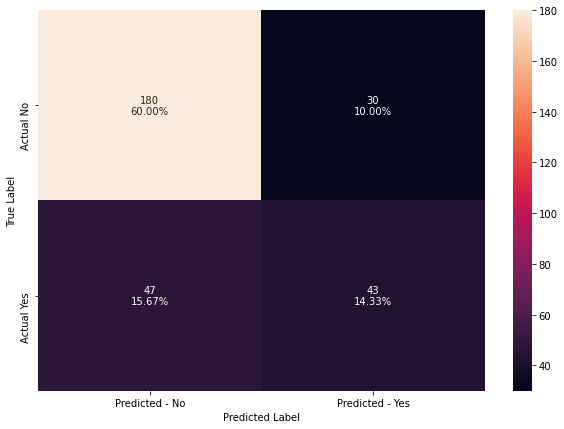

In [13]:
DisplayConfusionMatrix(bagging_estimator_model, y_test)

####  <span style="font-family: Arial; font-weight:bold;font-size:1.9em;color:#0e92ea"> Build Random Forest Classifier

In [14]:
randomForest_model = RandomForestClassifier(random_state=1)
randomForest_model.fit(x_train, y_train)

RandomForestClassifier(random_state=1)

In [15]:
randomForest_model_scores = GetMetricsScore(randomForest_model)

Accuracy on training set :  1.0
Accuracy on test set : 0.7533333333333333
Recall on training set :  1.0
Recall on test set : 0.4222222222222222
Precision on training set :  1.0
Precision on test set : 0.6333333333333333


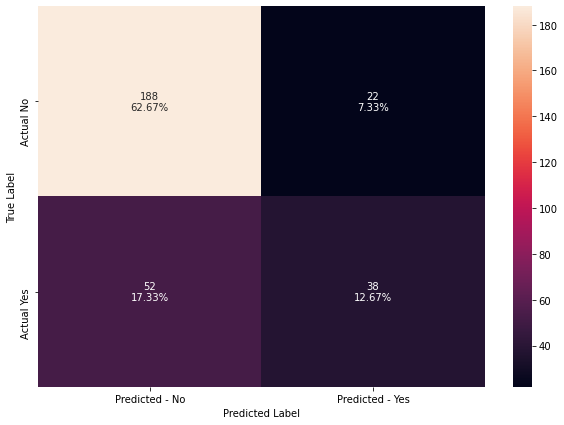

In [16]:
DisplayConfusionMatrix(randomForest_model, y_test)

####  <span style="font-family: Arial; font-weight:bold;font-size:1.9em;color:#0e92ea"> Hyperparamter Tuning and Grid Search

In [17]:
bagging_estimator_tuned_model = BaggingClassifier(random_state=1)

parameters = {
    'max_samples'  : [0.7, 0.8, 0.9, 1],
    'max_features' : [0.7, 0.8, 0.9, 1],
    'n_estimators' : [10, 20, 30, 40, 50]
}

acc_scorer = metrics.make_scorer(metrics.recall_score)

grid_obj = GridSearchCV(bagging_estimator_tuned_model, parameters, scoring=acc_scorer, cv=5)
gird_obj = grid_obj.fit(x_train, y_train)

bagging_estimator_tuned_model = grid_obj.best_estimator_
bagging_estimator_tuned_model.fit(x_train, y_train)


BaggingClassifier(max_features=0.9, max_samples=0.8, n_estimators=40,
                  random_state=1)

In [18]:
baggingEst_model_score = GetMetricsScore(bagging_estimator_tuned_model)

Accuracy on training set :  0.9885714285714285
Accuracy on test set : 0.7533333333333333
Recall on training set :  0.9619047619047619
Recall on test set : 0.45555555555555555
Precision on training set :  1.0
Precision on test set : 0.6212121212121212


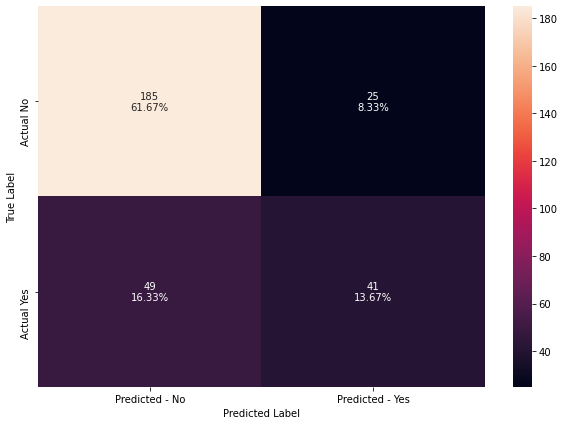

In [19]:
DisplayConfusionMatrix(bagging_estimator_tuned_model, y_test)

In [23]:
bagging_estimator_lr_model = BaggingClassifier(base_estimator=LogisticRegression(random_state=1, max_iter=1000), random_state=1)
bagging_estimator_lr_model.fit(x_train, y_train)

BaggingClassifier(base_estimator=LogisticRegression(max_iter=1000,
                                                    random_state=1),
                  random_state=1)

In [24]:
bagging_estimator_lr_model = GetMetricsScore(bagging_estimator_lr_model)

Accuracy on training set :  0.74
Accuracy on test set : 0.7166666666666667
Recall on training set :  0.34285714285714286
Recall on test set : 0.35555555555555557
Precision on training set :  0.6206896551724138
Precision on test set : 0.5423728813559322


In [25]:
DisplayConfusionMatrix(bagging_estimator_lr_model, y_test)

AttributeError: 'list' object has no attribute 'predict'